# AMAT 191 Special Topics (Machine Learning)
## Final Project

### Detecting Phishing Scams Using Machine Learning

Kylah Catherine B. Nulada | AMAT 191 (O) | SEM 1 AY 2021-2022

## Problem

As technology evolves, so do cyber attacks which includes all sorts of scams like phishing and the like. Phishing is a type of cyber attack that aims to steal or damage sensitive information. Usually under the guise of big reputable corporations, scammers and attackers would usually trick their victims into clicking phony urls or somehow lure them into revealing and sharing personal data like passwords or credit card information (Microsoft).
It is worthwhile to use machine learning techniques on this problem as it not only aids in a contemporary issue but it is also interesting to be able to use mathematical tools to analyze the presence of words and characters on websites.
In this paper, we'll be using machine learning techniques to train models with the aim of predicting whether or not a source is a possible phishing scam.

## Data

The data to be used in this paper is a 1.34 mb file collected from the Mendeley Data website, consisting of 49 columns and 10,000 rows. Using 5,000 phishing sites and 5,000 legitimate sites, 48 features were extracted from January to May 2015 as well as from May to June 2017. The data records the presence of different symbols, urls, https in links, path lengths, and the like and classifies them as either belonging to a phishing or legitimate site using binary labels. This is to better train the models to find patterns and features that would group them into either label which would then be used for phishing detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
#Loading the dataset
data= pd.read_csv("C:/Users/Admin/Documents/BS AMAT/Year 3 AY 2021-2022/sem 1/AMAT 191/INC/phising_data.csv",sep=",")
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
#Listing features of the dataset
data.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

## Techniques

We will be processing the data and using it to choose the best model from three different machine learning techniques: Decision Tree, Random Forest, and Support Vector Machines. These are just some of the commonly used ML techniques whose results will be compared in this paper.

### Data Preprocessing

In this section, we'll be cleaning up the data for use.

In [4]:
data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000

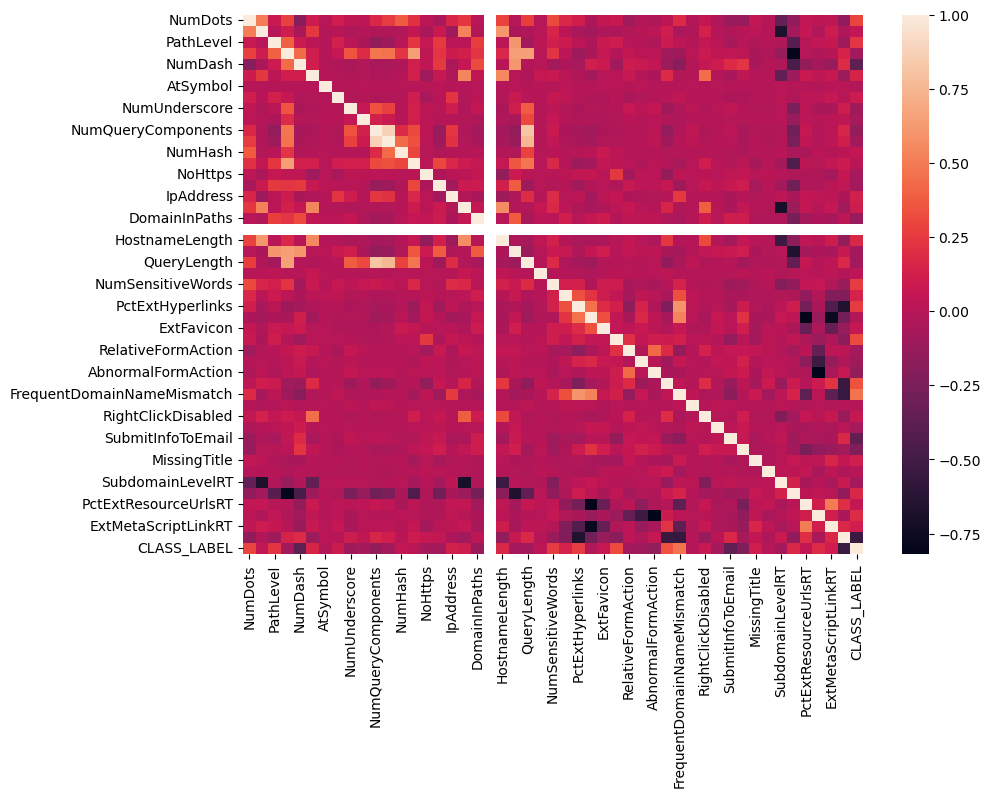

In [32]:
#Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())
plt.show()

In [6]:
#Checking the data for null or missing values
data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [7]:
# Shuffling the rows in the dataset for equal distribution during splitting
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,0,1,174,0,0,0,0,14,2,6,5,0,18,1,0,0,0,0,0,15,11,140,0,0,0,0.372093,0.92,0,1,1,0,1,0.000000,0,0,0,0,0,1,0,0,1,-1,-1,-1,-1,0,0
1,4,1,3,47,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,22,18,0,0,0,0,0.000000,0.00,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,3,1,3,68,0,0,0,1,0,0,0,0,0,7,1,1,0,0,0,0,29,32,0,0,0,0,0.083333,1.00,0,1,0,0,0,0.833333,0,0,0,0,0,0,0,0,1,0,-1,1,-1,-1,1
3,2,0,3,47,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,25,0,0,1,0,0.000000,1.00,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,-1,1,1
4,2,0,4,53,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,8,38,0,0,0,1,1.000000,1.00,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,-1,1,-1,-1,1


### Data Splitting

Now that we have preprocessed our data, let us assign the features to X and class labels to Y as well as split the dataset into training data and testing data at a ratio of 8:2.

In [8]:
# Sepratating and assigning features and target columns to X & Y
y = data['CLASS_LABEL']
X = data.drop('CLASS_LABEL',axis=1)
X.shape, y.shape

((10000, 48), (10000,))

In [9]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 48), (2000, 48))

### Model Training

Next, we have model training. In this section, we will be using the split training data to train models using the three ML techniques mentioned before. These techniques will be used to classify the data according to 'CLASS_LABEL', whether or not the data is from a phishing site.

In [10]:
#Importing packages
from sklearn.metrics import accuracy_score

In [11]:
# Creating holders to store model performance results
ML_Model = []
acc_train = []
acc_test = []

#Function to call for result storing
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

#### Decision Tree

The Decision Tree algorithm is a supervised learning algorithm, used for classification and regression modeling. It is visualized as a flowchart that starts with a root node and branches out and is used as a means for either classifying data or predicting the future of data (Coursera, 2022).

In [12]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)

# Model fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
# Predicting the target value of samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [14]:
# Model Performance Accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.966
Decision Tree: Accuracy on test Data: 0.959


In [15]:
# Storing the results
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

#### Random Forest

Random Forest is a supervised learning algorithm derived from the decision tree technique. Basically, it consists of numerous decision trees hence why it is called a forest. Similarly, it is also used for regression and data classification problems (Mbaabu, 2020).

In [16]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)

# Model fitting
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [17]:
# Predicting the target value of samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [18]:
# Model Performance Accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.966
Random forest: Accuracy on test Data: 0.954


In [19]:
# Storing the results
storeResults('Random Forest', acc_train_forest, acc_test_forest)

#### Support Vector Machines

Support Vector Machine or SVM is another supervised machine learning technique widely used in classification problems. The objective of this algorithm is to determine a hyperplane in an N-dimensional space in which the data points would be distinctly classified (Gandhi, 2018).

In [20]:
# Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)

# Model fitting
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [21]:
# Predicting the target value of samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [22]:
# Model Performance Accuracy
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.949
SVM : Accuracy on test Data: 0.942


In [23]:
# Storing the results
storeResults('SVM', acc_train_svm, acc_test_svm)

## Results and Discussion

Now that we have achieved results from the three machine learning techniques, let us determine which of the developed models best classified the data.

### Model Comparison

Let us compare the accuracy of the developed models.

In [24]:
# Creating a dataframe of the accuracy results in order
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.966,0.958
1,Random Forest,0.966,0.954
2,SVM,0.949,0.942


As we can observe, while the Decision Tree model and Random Forest model achieved equal accuracy with the training data, the Decision Tree model has a higher accuracy with the testing data. Meanwhile, despite being fairly accurate, the SVM model achieved lowest accuracy results.

## Conclusion

From the computed results, we can conclude that the Decision Tree machine learning technique is the most accurate among the three tested algorithms when it comes to phishing detection. Therefore, the Decision Tree model is recommended for classifying potentially harmful sites that are under suspicion of phishing scams.

## References

Coursera. (2022, September 28). *Decision Trees in Machine Learning: Two Types (+ Examples)*. Coursera. https://www.coursera.org/articles/decision-tree-machine-learning

Gandhi, R. (2018, June 8). *Support Vector Machine — Introduction to Machine Learning Algorithms*. Towards Data Science. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

Mbaabu, O. (2020, December 11). *Introduction to Random Forest in Machine Learning*. Section. https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

Microsoft. (n.d.). *What is phishing?* Microsoft Security. https://www.microsoft.com/en-ww/security/business/security-101/what-is-phishing

Tan, C. L. (2018, March 24). *Phishing Dataset for Machine Learning: Feature Evaluation*. Mendeley Data. https://data.mendeley.com/datasets/h3cgnj8hft/1